<a href="https://colab.research.google.com/github/abhiyantaabhishek/tutorial/blob/master/7.%20logistic_regression_MNIST_Fashion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Logistic Regression MNIST Fashion Dataset  Example

MNIST Dataset  Logistic regression example for understanding the concept 


Import the library

In [185]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Initilise the paramaters

In [186]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [187]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

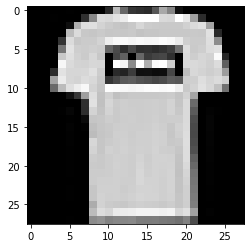

In [188]:
plt.imshow(train_images[1],cmap='gray')

In [189]:
class_names[train_labels[1]]

'T-shirt/top'

In [190]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [191]:

train_labels = tf.one_hot(train_labels, depth=10)
test_labels = tf.one_hot(test_labels, depth=10)

In [192]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10,activation='softmax')
])

In [193]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


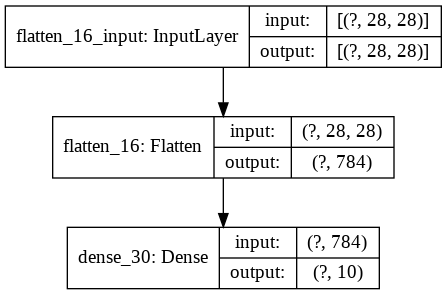

In [194]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [195]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [196]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5979 - accuracy: 0.7987
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4602 - accuracy: 0.8430
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4348 - accuracy: 0.8504
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4219 - accuracy: 0.8546
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4130 - accuracy: 0.8577
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4071 - accuracy: 0.8590
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4006 - accuracy: 0.8606
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3983 - accuracy: 0.8615
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3941 - accuracy: 0.8626
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.393

In [197]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4415 - accuracy: 0.8457

Test accuracy: 0.8457000255584717


In [198]:
predictions = model.predict(test_images)

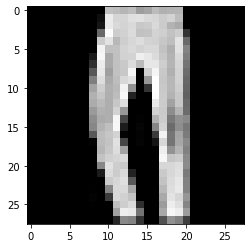

In [199]:
plt.imshow(test_images[5],cmap='gray')

In [200]:
class_names[np.argmax(predictions[5])]

'Trouser'

#Deep Netwok

In [201]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [202]:
train_images = train_images / 255.0
train_labels = tf.one_hot(train_labels, depth=10)

In [203]:
train_images = np.expand_dims(train_images , 3)

In [204]:
test_images = np.expand_dims(test_images , 3)

In [205]:
test_labels = tf.one_hot(test_labels, depth=10)

In [206]:
train_images.shape

(60000, 28, 28, 1)

In [207]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total params: 804,394
Trainable params: 804,394
Non-trainable params: 0
_______________________________________________

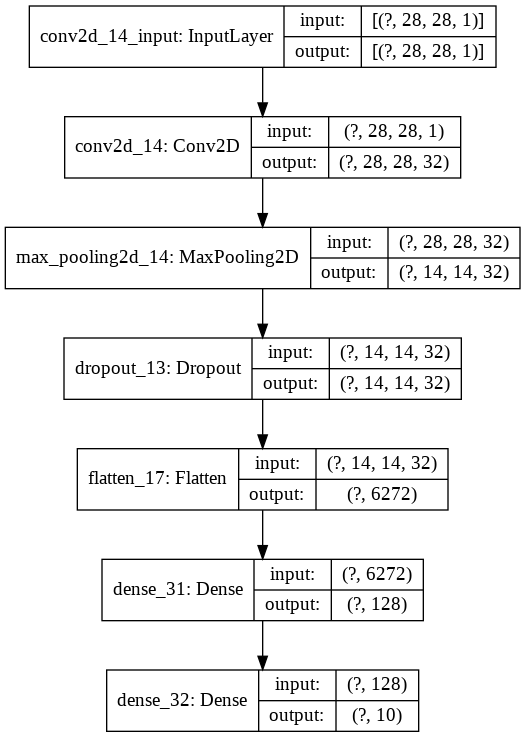

In [208]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [209]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [210]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4343 - accuracy: 0.8453
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3223 - accuracy: 0.8824
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2838 - accuracy: 0.8956
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2558 - accuracy: 0.9062
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2363 - accuracy: 0.9103
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2187 - accuracy: 0.9181
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2053 - accuracy: 0.9237
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1923 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1845 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.171

In [211]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 58.7297 - accuracy: 0.8518

Test accuracy: 0.8518000245094299


In [212]:
predictions = model.predict(test_images)

In [213]:
test_images[5].shape

(28, 28, 1)

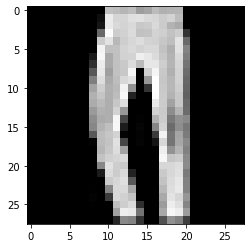

In [214]:
plt.imshow(test_images[5,:,:,0],cmap='gray')

In [215]:
predictions.shape

(10000, 10)

In [216]:
class_names[np.argmax(predictions[5])]

'Trouser'